1.主成分分析的步骤：
        1.根据研究问题选取初始分析变量；
        2.根据初始变量特性判断由协方差阵求主成分还是由相关阵求主成分（数据标准化的话需要用系数相关矩阵，数据未标准化则用协方差阵）；
        3.求协差阵或相关阵的特征根与相应标准特征向量；
        4.判断是否存在明显的多重共线性，若存在，则回到第一步；
        5.主成分分析的适合性检验
        6.得到主成分的表达式并确定主成分个数，选取主成分；
        7.结合主成分对研究问题进行分析并深入研究。


2.部分说明
    一组数据是否可以用主成分分析，必须做适合性检验。可以用球形检验和KMO统计量检验。
 （1）球形检验（Bartlett)
        球形检验的假设：
                H0：相关系数矩阵为单位阵（即变量不相关）
                H1：相关系数矩阵不是单位阵（即变量间有相关关系）


（2）KMO（Kaiser-Meyer-Olkin)统计量
        KMO统计量比较样本相关系数与样本偏相关系数，它用于检验样本是否适于作主成分分析。
        KMO的值在0,1之间，该值越大，则样本数据越适合作主成分分析和因子分析。一般要求该值大于0.5，方可作主成分分析或者相关分析。
        Kaiser在1974年给出了经验原则：
                0.9以上       适合性很好
                0.8~0.9        适合性良好
                0.7~0.8        适合性中等
                0.6~0.7        适合性一般
                0.5~0.6        适合性不好
                0.5以下       不能接受的

# 1.导入库

In [2]:
# 数据处理
import pandas as pd
import numpy as np

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 数据导入

In [2]:
df = pd.read_csv(r"D:\M\python\主成分分析\aa.csv", index_col=0).reset_index(drop=True)
df

,x1,x2,x3,x4,x5,x6,x7,x8
0,8070.4,2643.0,12128.0,2511.0,5077.9,4054.7,2629.8,1140.6
1,8679.6,2114.0,6187.3,1663.8,3991.9,2643.6,2172.2,892.2
2,4991.6,1614.4,4483.2,1351.1,2664.1,1991.3,1549.9,460.4
3,3862.8,1603.0,3633.8,951.6,2401.0,2439.0,1651.6,450.1
4,6445.8,2543.3,4006.1,1565.1,3045.2,2598.9,1840.2,699.9
5,6901.6,2321.3,4632.8,1558.2,3447.0,3018.5,2313.6,802.8
6,4975.7,1819.0,3612.0,1107.1,2691.0,2367.5,2059.2,534.9
7,5019.3,1804.4,3352.4,1018.9,2462.9,2011.5,2007.5,468.3
8,10014.8,1834.8,13216.0,1868.2,4447.5,4533.5,2839.9,1102.1
9,7389.2,1809.5,6140.6,1616.2,3952.4,3163.9,1624.5,736.6


# 3.进行球状检验
    检验总体变量的相关矩阵是否是单位阵（相关系数矩阵对角线的所有元素均为1,所有非对角线上的元素均为零）；即检验各个变量是否各自独立。

In [9]:
# Bartlett's球状检验
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(chi_square_value, p_value)

216.20347426244766 5.657066657831436e-31


## p值<0.05时，说明各变量间具有相关性，因子分析有效。

 # 4.KMO检验
 检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。

In [10]:
# 通常取值从0.6开始进行因子分析
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_all)

[0.76092511 0.69250268 0.84453486 0.90484994 0.91772132 0.8494689
 0.82558917 0.81666874]


## Kaiser在1974年给出了经验原则：
                0.9以上       适合性很好
                0.8~0.9        适合性良好
                0.7~0.8        适合性中等
                0.6~0.7        适合性一般
                0.5~0.6        适合性不好
                0.5以下       不能接受的

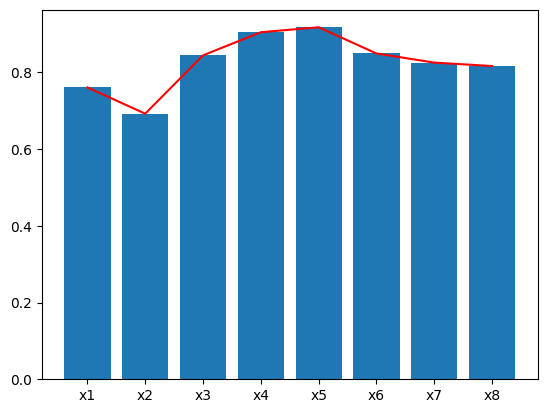

In [17]:
plt.bar(df.columns,kmo_all)
plt.plot(df.columns,kmo_all,color='r')

# 5.求相关矩阵
## （1）数据标准化做法
### 1.进行标准化 ,用到了 preprocessing 库

In [3]:
from sklearn import preprocessing
df = preprocessing.scale(df)
df

array([[ 1.02281473e+00,  2.39957305e+00,  3.16115070e+00,
         3.61550657e+00,  2.50214644e+00,  2.28963248e+00,
         2.07693756e+00,  2.80609239e+00],
       [ 1.44249462e+00,  9.95337984e-01,  5.78706906e-01,
         9.35606023e-01,  1.15755360e+00,  1.92901318e-01,
         1.10470911e+00,  1.57963146e+00],
       [-1.09818075e+00, -3.30854531e-01, -1.62071532e-01,
        -5.35404603e-02, -4.86415424e-01, -7.76340931e-01,
        -2.17445100e-01, -5.52356563e-01],
       [-1.87581480e+00, -3.61115930e-01, -5.31308787e-01,
        -1.31725655e+00, -8.12163467e-01, -1.11110584e-01,
        -1.37072588e-03, -6.03212229e-01],
       [-9.63775717e-02,  2.13491854e+00, -3.69468629e-01,
         6.23393814e-01, -1.45698172e-02,  1.26482296e-01,
         3.99333571e-01,  6.30161113e-01],
       [ 2.17624553e-01,  1.54561762e+00, -9.70398706e-02,
         6.01567428e-01,  4.82904769e-01,  7.49959297e-01,
         1.40513110e+00,  1.13822403e+00],
       [-1.10913431e+00,  2.122579

 ### 2.求相关系数矩阵

In [4]:
covX = np.around(np.corrcoef(df.T),decimals=3)
covX

array([[1.   , 0.19 , 0.676, 0.511, 0.622, 0.452, 0.111, 0.659],
       [0.19 , 1.   , 0.358, 0.676, 0.468, 0.406, 0.57 , 0.682],
       [0.676, 0.358, 1.   , 0.767, 0.789, 0.816, 0.559, 0.822],
       [0.511, 0.676, 0.767, 1.   , 0.739, 0.755, 0.608, 0.826],
       [0.622, 0.468, 0.789, 0.739, 1.   , 0.799, 0.532, 0.799],
       [0.452, 0.406, 0.816, 0.755, 0.799, 1.   , 0.661, 0.71 ],
       [0.111, 0.57 , 0.559, 0.608, 0.532, 0.661, 1.   , 0.633],
       [0.659, 0.682, 0.822, 0.826, 0.799, 0.71 , 0.633, 1.   ]])

### 3.求解特征值与特征向量

In [5]:
#求解系数相关矩阵的特征值和特征向量
featValue, featVec=  np.linalg.eig(covX.T)
featValue, featVec

(array([5.39826106, 1.11068641, 0.65068806, 0.28655148, 0.23164097,
        0.06850326, 0.131855  , 0.12181376]),
 array([[-0.27749368,  0.62604991, -0.34126671, -0.35502706,  0.05108308,
          0.13741295, -0.51562062,  0.0345711 ],
        [-0.28090255, -0.52066712, -0.60835682,  0.12612986,  0.11053686,
          0.33586363, -0.08901653, -0.36200279],
        [-0.38591666,  0.24352771,  0.22380993, -0.1519889 , -0.34703124,
          0.4884528 ,  0.5379232 , -0.2649394 ],
        [-0.38945652, -0.10027267, -0.14150117,  0.35005389, -0.58316579,
         -0.07393724, -0.09787692,  0.58359212],
        [-0.38226741,  0.15976394,  0.09295626,  0.37057117,  0.70979665,
          0.14206587,  0.21371933,  0.33572802],
        [-0.37373669,  0.01338498,  0.47383533,  0.36974959, -0.04478623,
         -0.21596766, -0.44639495, -0.50098978],
        [-0.3068914 , -0.49179908,  0.38942315, -0.60498635,  0.12512195,
          0.10743829, -0.2139662 ,  0.27076269],
        [-0.40434285,  0.

## （2）数据不标准化做法
### 1.求均值

In [21]:
def meanX(dataX):
    return np.mean(dataX,axis=0)#axis=0表示依照列来求均值。假设输入list,则axis=1
average = meanX(df)
average

array([-5.81971747e-16,  7.87900211e-16,  3.58136460e-18,  7.41342471e-16,
        5.45038924e-16,  4.32449775e-16, -4.79902856e-16,  5.14821161e-17])

### 2.查看列数和行数

In [22]:
m, n = np.shape(df)
m,n

(31, 8)

### 3.写出同数据集一样的均值矩阵

In [23]:
data_adjust = []
avgs = np.tile(average, (m, 1))
avgs

array([[-5.81971747e-16,  7.87900211e-16,  3.58136460e-18,
         7.41342471e-16,  5.45038924e-16,  4.32449775e-16,
        -4.79902856e-16,  5.14821161e-17],
       [-5.81971747e-16,  7.87900211e-16,  3.58136460e-18,
         7.41342471e-16,  5.45038924e-16,  4.32449775e-16,
        -4.79902856e-16,  5.14821161e-17],
       [-5.81971747e-16,  7.87900211e-16,  3.58136460e-18,
         7.41342471e-16,  5.45038924e-16,  4.32449775e-16,
        -4.79902856e-16,  5.14821161e-17],
       [-5.81971747e-16,  7.87900211e-16,  3.58136460e-18,
         7.41342471e-16,  5.45038924e-16,  4.32449775e-16,
        -4.79902856e-16,  5.14821161e-17],
       [-5.81971747e-16,  7.87900211e-16,  3.58136460e-18,
         7.41342471e-16,  5.45038924e-16,  4.32449775e-16,
        -4.79902856e-16,  5.14821161e-17],
       [-5.81971747e-16,  7.87900211e-16,  3.58136460e-18,
         7.41342471e-16,  5.45038924e-16,  4.32449775e-16,
        -4.79902856e-16,  5.14821161e-17],
       [-5.81971747e-16,  7.879002

### 4.对数据集进行去中心化

In [24]:
data_adjust = df - avgs
data_adjust

array([[ 1.02281473e+00,  2.39957305e+00,  3.16115070e+00,
         3.61550657e+00,  2.50214644e+00,  2.28963248e+00,
         2.07693756e+00,  2.80609239e+00],
       [ 1.44249462e+00,  9.95337984e-01,  5.78706906e-01,
         9.35606023e-01,  1.15755360e+00,  1.92901318e-01,
         1.10470911e+00,  1.57963146e+00],
       [-1.09818075e+00, -3.30854531e-01, -1.62071532e-01,
        -5.35404603e-02, -4.86415424e-01, -7.76340931e-01,
        -2.17445100e-01, -5.52356563e-01],
       [-1.87581480e+00, -3.61115930e-01, -5.31308787e-01,
        -1.31725655e+00, -8.12163467e-01, -1.11110584e-01,
        -1.37072588e-03, -6.03212229e-01],
       [-9.63775717e-02,  2.13491854e+00, -3.69468629e-01,
         6.23393814e-01, -1.45698172e-02,  1.26482296e-01,
         3.99333571e-01,  6.30161113e-01],
       [ 2.17624553e-01,  1.54561762e+00, -9.70398706e-02,
         6.01567428e-01,  4.82904769e-01,  7.49959297e-01,
         1.40513110e+00,  1.13822403e+00],
       [-1.10913431e+00,  2.122579

### 5.计算协方差阵

In [25]:
covX = np.cov(data_adjust.T)   #计算协方差矩阵
covX

array([[1.03333333, 0.19609715, 0.69879999, 0.52817181, 0.64289957,
        0.46758142, 0.11475425, 0.68135687],
       [0.19609715, 1.03333333, 0.37037575, 0.69846153, 0.48341749,
        0.41965408, 0.58885095, 0.70449309],
       [0.69879999, 0.37037575, 1.03333333, 0.79290742, 0.81546813,
        0.84298239, 0.57731994, 0.8489081 ],
       [0.52817181, 0.69846153, 0.79290742, 1.03333333, 0.763136  ,
        0.77988379, 0.62800873, 0.85357286],
       [0.64289957, 0.48341749, 0.81546813, 0.763136  , 1.03333333,
        0.82580813, 0.54944998, 0.82585037],
       [0.46758142, 0.41965408, 0.84298239, 0.77988379, 0.82580813,
        1.03333333, 0.68329982, 0.73405308],
       [0.11475425, 0.58885095, 0.57731994, 0.62800873, 0.54944998,
        0.68329982, 1.03333333, 0.65401815],
       [0.68135687, 0.70449309, 0.8489081 , 0.85357286, 0.82585037,
        0.73405308, 0.65401815, 1.03333333]])

### 6.计算协方差阵的特征值和特征向量

In [26]:
featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
featValue, featVec

(array([5.57826839, 1.14787543, 0.67197455, 0.29572876, 0.23977111,
        0.0713498 , 0.13607757, 0.12562106]),
 array([[-0.27760081,  0.62596292, -0.34055671, -0.356679  ,  0.05078338,
          0.14132794, -0.51308836,  0.04579551],
        [-0.280872  , -0.52070675, -0.60844759,  0.12610086,  0.11167685,
          0.33528311, -0.09585438, -0.36026513],
        [-0.3859206 ,  0.24329543,  0.22314388, -0.14964195, -0.34760052,
          0.48352914,  0.53530556, -0.28019301],
        [-0.38941131, -0.10025649, -0.1421576 ,  0.34930889, -0.5845645 ,
         -0.07306636, -0.08590938,  0.58450596],
        [-0.38225388,  0.15993368,  0.09334377,  0.37077541,  0.70841374,
          0.14305914,  0.22145255,  0.33280408],
        [-0.37378432,  0.01324989,  0.4737431 ,  0.36917278, -0.04308639,
         -0.21500496, -0.45987551, -0.48971379],
        [-0.30682288, -0.49193383,  0.39011563, -0.60539622,  0.1235183 ,
          0.11044168, -0.20504013,  0.27508263],
        [-0.40435109,  0.

# 7.对特征值进行排序并输出  降序

In [6]:
featValue = sorted(featValue)[::-1]
featValue

[5.39826105614674,
 1.1106864064533546,
 0.6506880630363168,
 0.2865514813889915,
 0.23164096989006522,
 0.13185500023952823,
 0.12181376168401657,
 0.06850326116099208]

# 8.绘制散点与折线图

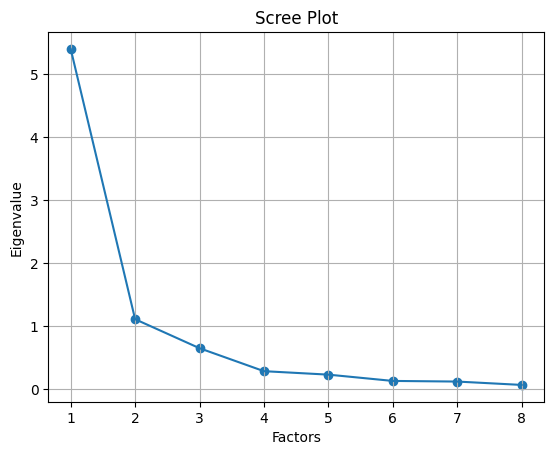

In [7]:
# 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), featValue)
plt.plot(range(1, df.shape[1] + 1), featValue)

# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

plt.grid()  # 显示网格
plt.show()  # 显示图形

# 9.求特征值的贡献度

In [8]:
gx = featValue/np.sum(featValue)
gx

array([0.67478263, 0.1388358 , 0.08133601, 0.03581894, 0.02895512,
       0.01648188, 0.01522672, 0.00856291])

# 10.求特征值的累计贡献度

In [9]:
lg = np.cumsum(gx)
lg

array([0.67478263, 0.81361843, 0.89495444, 0.93077338, 0.9597285 ,
       0.97621037, 0.99143709, 1.        ])

# 11.选出主成分

In [10]:
#选出主成分
k=[i for i in range(len(lg)) if lg[i]<0.85]
k = list(k)
print(k)

[0, 1]


# 12.选出主成分对应的特征向量矩阵

In [32]:
selectVec = np.matrix(featVec.T[k]).T
selectVe=selectVec*(-1)
selectVec

matrix([[-0.27760081,  0.62596292],
        [-0.280872  , -0.52070675],
        [-0.3859206 ,  0.24329543],
        [-0.38941131, -0.10025649],
        [-0.38225388,  0.15993368],
        [-0.37378432,  0.01324989],
        [-0.30682288, -0.49193383],
        [-0.40435109,  0.00613602]])

# 13.求主成分得分


In [33]:
finalData = np.dot(data_adjust,selectVec)
finalData

matrix([[-7.16996179e+00, -7.76597008e-01],
        [-2.75992931e+00,  8.56017020e-02],
        [ 1.24736101e+00, -5.33707034e-01],
        [ 1.93646679e+00, -1.11774799e+00],
        [-1.09209413e+00, -1.51761792e+00],
        [-2.04762468e+00, -1.34958676e+00],
        [ 8.42156785e-01, -1.35544144e+00],
        [ 1.46924294e+00, -1.31610233e+00],
        [-6.35762520e+00,  1.16175588e+00],
        [-1.82225103e+00,  5.30338114e-01],
        [-2.63221397e+00,  1.21830397e+00],
        [ 1.51628437e+00,  5.65626280e-01],
        [ 6.54503843e-03,  1.83778930e+00],
        [ 2.35250531e+00,  6.18152534e-01],
        [-3.75083048e-02, -6.89771794e-01],
        [ 1.37974948e+00, -8.89368847e-01],
        [ 1.21169696e+00, -1.69196454e-01],
        [ 2.92187233e-01,  1.92087137e-01],
        [-2.35842249e+00,  2.10026100e+00],
        [ 2.94069828e+00,  1.32864086e+00],
        [ 2.40348020e+00,  1.71742153e+00],
        [ 4.79052128e-01, -4.46001237e-01],
        [ 7.21792062e-01,  2.503

# 14.绘制热力图

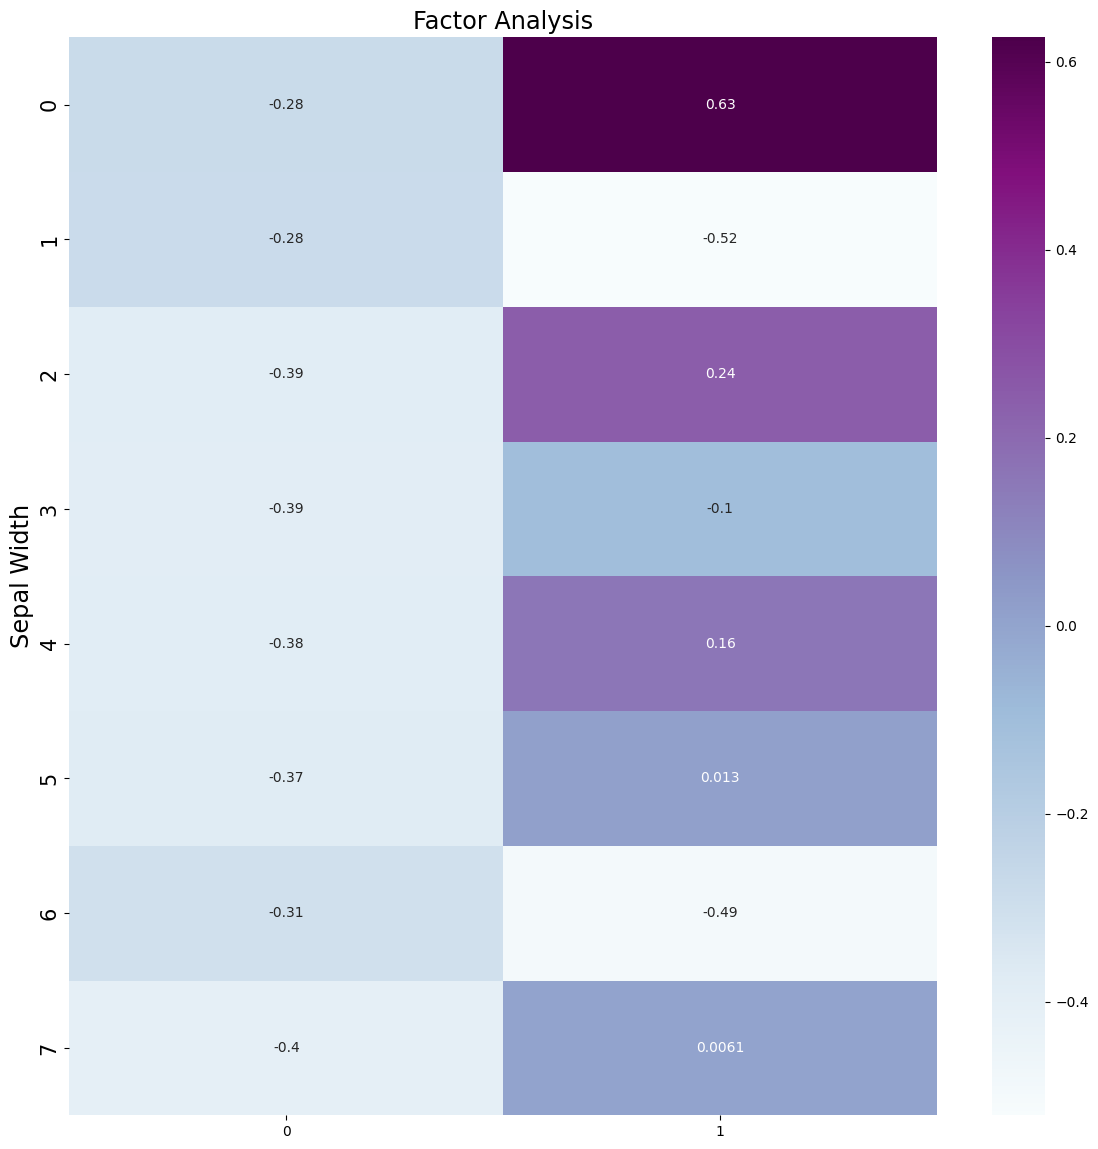

In [34]:
# 绘图

plt.figure(figsize = (14,14))
ax = sns.heatmap(selectVec, annot=True, cmap="BuPu")

# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")

# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

# 保存图片
# plt.savefig("factorAnalysis", dpi=500)